[*********************100%***********************]  7 of 7 completed


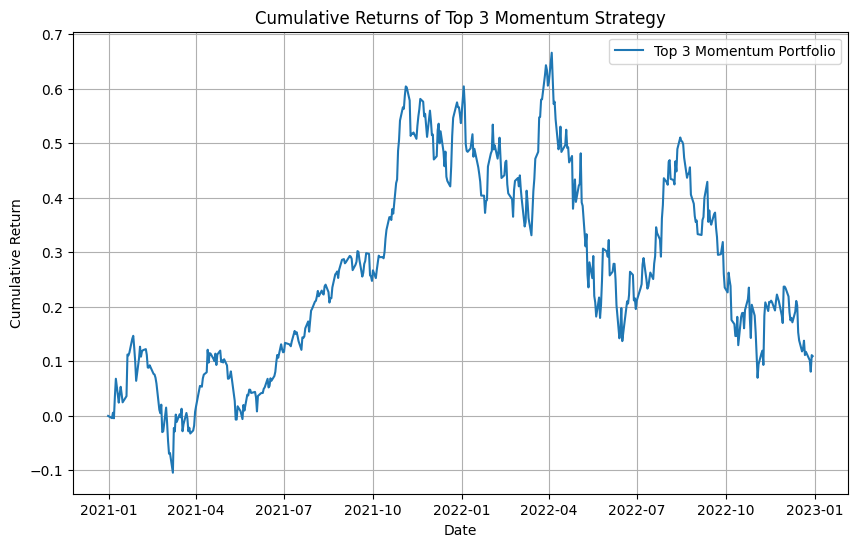

Cumulative Return: 10.94%
Annualized Return: 3.52%
Annualized Volatility: 34.04%


<ipython-input-4-8c4be8dc6302>:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = cumulative_returns[-1]


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NFLX']  # List of stock tickers
start_date = '2020-01-01'
end_date = '2023-01-01'
momentum_lookback = 252  # Look-back period for momentum (252 trading days = ~1 year)
top_n = 3  # Number of top stocks to select based on momentum

# Fetch stock data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate momentum as the 12-month return (252 trading days)
momentum = data.pct_change(periods=momentum_lookback).iloc[momentum_lookback:]

# Function to calculate portfolio returns based on top momentum stocks
def momentum_strategy(momentum, returns, top_n):
    portfolio_returns = pd.Series(index=returns.index, dtype='float64')

    for date in momentum.index:
        # Select top n stocks based on momentum
        top_stocks = momentum.loc[date].nlargest(top_n).index
        # Calculate the equal-weighted portfolio return
        portfolio_returns.loc[date] = returns.loc[date, top_stocks].mean()

    return portfolio_returns

# Run the momentum strategy
portfolio_returns = momentum_strategy(momentum, returns, top_n)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label=f'Top {top_n} Momentum Portfolio')
plt.title(f'Cumulative Returns of Top {top_n} Momentum Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics
cumulative_return = cumulative_returns[-1]
annualized_return = (1 + cumulative_return) ** (252 / len(cumulative_returns)) - 1
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

print(f'Cumulative Return: {cumulative_return:.2%}')
print(f'Annualized Return: {annualized_return:.2%}')
print(f'Annualized Volatility: {annualized_volatility:.2%}')
